In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('/Users/hongrudu/Desktop/COVID_Vaccination_rate/results')

In [3]:
pre_delta = pd.read_csv('Pre-Delta_PI_range.csv').drop(columns = {'Unnamed: 0'})
delta = pd.read_csv('Delta_PI_range.csv').drop(columns = {'Unnamed: 0'})
Omicron = pd.read_csv('Omicron_PI_range.csv').drop(columns = {'Unnamed: 0'})

In [4]:
data = pd.concat([pre_delta, delta, Omicron])
label = ['12 Weeks', '16 Weeks', '20 Weeks', '24 Weeks']
colors = ['forestgreen' ,'deepskyblue', 'crimson', 'gold']

Text(0.05, 0.05, 'c: Omicron-RCHR')

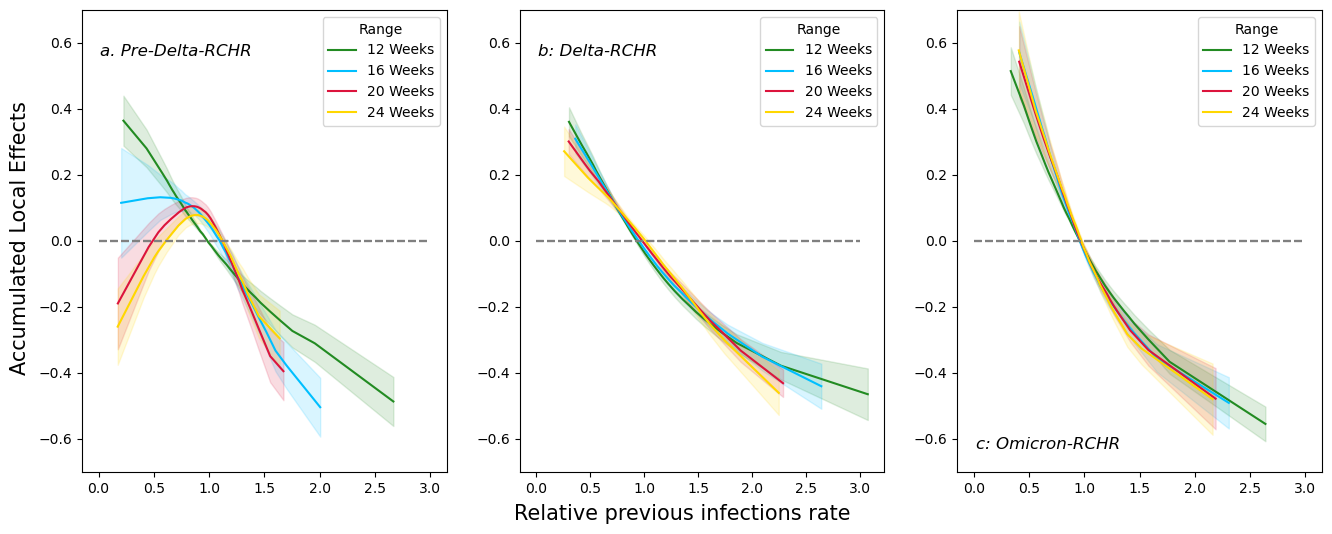

In [5]:
fig, axs = plt.subplots(1, 3, figsize = (16,6))
index = 0
for i in [0, 1, 2]:
    data_selected = data[data['model']==data['model'].unique()[index]]
    j = 0
    for col in data_selected['Var'].unique():
        
        var = data_selected[data_selected['Var'] == col]['var']
        est = data_selected[data_selected['Var'] == col]['est']
        se = data_selected[data_selected['Var'] == col]['se']
        
        plt.setp(axs[i], ylim=(-0.7, 0.7))
        axs[i].plot(var, est, color = colors[j], label = label[j])
        axs[i].fill_between(var, est + 1.96*se, est - 1.96*se, color = colors[j], alpha =.15)
        axs[i].legend(title = 'Range')
        axs[i].hlines(y=0, color='grey', xmin=0, xmax=3, linestyle = '--')
        j += 1   
    index += 1

fig.text(0.5, 0.03, 'Relative previous infections rate', ha='center', fontsize = 15)
fig.text(0.08, 0.5, 'Accumulated Local Effects', va='center', rotation='vertical', fontsize = 15)

plt.text(0.05, 0.9, "a. Pre-Delta-RCHR", transform=axs[0].transAxes, fontstyle = 'italic', fontsize = 12)
plt.text(0.05, 0.9, "b: Delta-RCHR", transform=axs[1].transAxes, fontstyle = 'italic', fontsize = 12)
plt.text(0.05, 0.05, "c: Omicron-RCHR", transform=axs[2].transAxes, fontstyle = 'italic', fontsize = 12)

In [6]:
fig.savefig('/Users/hongrudu/Desktop/COVID_Vaccination_rate/figures/Appendix_figure_5.png', bbox_inches='tight', dpi=400)

### Sensitivity on lags

In [12]:
pre_delta = pd.read_csv('Pre-Delta_PI_lag.csv').drop(columns = {'Unnamed: 0'})
delta = pd.read_csv('Delta_PI_lag.csv').drop(columns = {'Unnamed: 0'})
Omicron = pd.read_csv('Omicron_PI_lag.csv').drop(columns = {'Unnamed: 0'})

In [14]:
data = pd.concat([pre_delta, delta, Omicron])
label = ['4 Weeks', '8 Weeks', '12 Weeks', '16 Weeks']
colors = ['forestgreen' ,'deepskyblue', 'crimson', 'gold']

Text(0.05, 0.05, 'c: Omicron-RCHR')

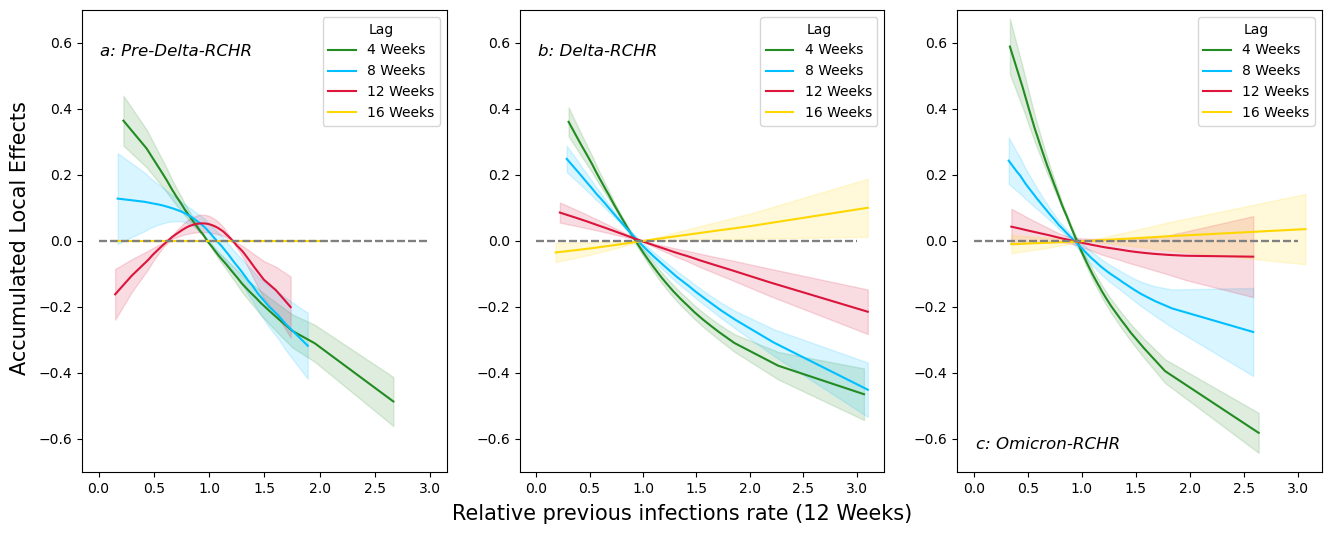

In [15]:
fig, axs = plt.subplots(1, 3, figsize = (16,6))
index = 0
for i in [0, 1, 2]:
    data_selected = data[data['model']==data['model'].unique()[index]]
    j = 0
    for col in data_selected['Var'].unique():
        
        var = data_selected[data_selected['Var'] == col]['var']
        est = data_selected[data_selected['Var'] == col]['est']
        se = data_selected[data_selected['Var'] == col]['se']
        
        plt.setp(axs[i], ylim=(-0.7, 0.7))
        axs[i].plot(var, est, color = colors[j], label = label[j])
        axs[i].fill_between(var, est + 1.96*se, est - 1.96*se, color = colors[j], alpha =.15)
        axs[i].legend(title = 'Lag')
        axs[i].hlines(y=0, color='grey', xmin=0, xmax=3, linestyle = '--')
        j += 1   
    index += 1
fig.text(0.5, 0.03, 'Relative previous infections rate (12 Weeks)', ha='center', fontsize = 15)
fig.text(0.08, 0.5, 'Accumulated Local Effects', va='center', rotation='vertical', fontsize = 15)

plt.text(0.05, 0.9, "a: Pre-Delta-RCHR", transform=axs[0].transAxes, fontstyle = 'italic', fontsize = 12)
plt.text(0.05, 0.9, "b: Delta-RCHR", transform=axs[1].transAxes, fontstyle = 'italic', fontsize = 12)
plt.text(0.05, 0.05, "c: Omicron-RCHR", transform=axs[2].transAxes, fontstyle = 'italic', fontsize = 12)

In [16]:
fig.savefig('/Users/hongrudu/Desktop/COVID_Vaccination_rate/figures/Appendix_figure_6.png', bbox_inches='tight', dpi=400)